In [96]:
from matplotlib import patches
from matplotlib import pyplot

import numpy as np
import matplotlib.pyplot as plt
from math import tan, pi

from matplotlib.patches import Ellipse, Polygon

In [97]:
d_mur = 1
em = 0.5

x_fond = 0.6
alpha = 60 # pente
# Couche 1 : TV
h1 = 0.4
#Couche 2 :
h2 = 0.8
# Couche 3 :
h3 = 0.3
# Mur
h_mur = 0.5
#Fondation, débord 1 :
deb1 = 0.2
h_fond1 = 0.3
#Fondation débord 2 :
deb2 = 0.4
h_fond2 = 0.4

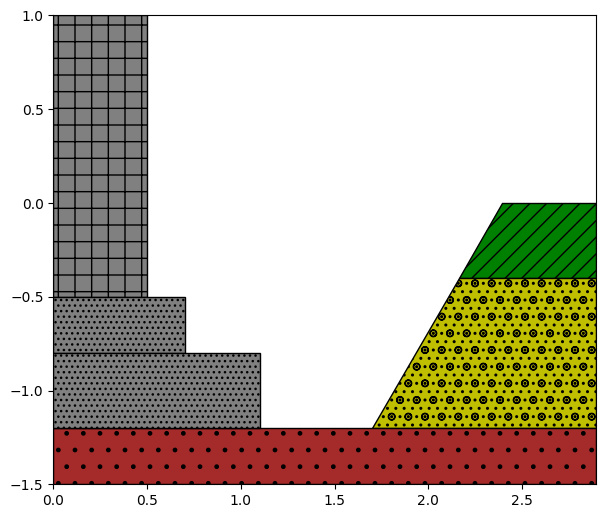

In [98]:
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(7)

axs = fig.subplot_mosaic([['patches']])

x_pente = (h1+h2)/tan(alpha*pi/180)
x1 = h1/tan(alpha*pi/180)
x1_c1 = em+deb1+deb2+x_fond+x_pente
y1_c1 = 0
x2_c1 = 2*em+deb1+deb2+x_fond+x_pente
y2_c1 = 0
x3_c1 = 2*em+deb1+deb2+x_fond+x_pente
y3_c1 = -h1
x4_c1 = em+deb1+deb2+x_fond - x1 + x_pente
y4_c1 = -h1
axs['patches'].add_patch(Polygon([(x1_c1, y1_c1), (x2_c1, y2_c1), (x3_c1, y3_c1),(x4_c1,y4_c1)],
                                 hatch='//', facecolor='g',edgecolor = 'black'))
x1_c2 = x4_c1
y1_c2 = y4_c1
x2_c2 = x3_c1
y2_c2 = y3_c1
x3_c2 = x2_c2
y3_c2 = -(h1+h2)
x4_c2 = x4_c1 - h2/tan(alpha*pi/180)
y4_c2 = -(h1+h2)
axs['patches'].add_patch(Polygon([(x1_c2, y1_c2), (x2_c2, y2_c2), (x3_c2, y3_c2),(x4_c2,y4_c2)],
                                 hatch='..o', facecolor='y',edgecolor = 'black'))

x1_c3 = 0
y1_c3 = y4_c2
x2_c3 = x3_c2
y2_c3 = y3_c2
x3_c3 = x2_c3
y3_c3 = -(h1+h2+h3)
x4_c3 = 0
y4_c3 = -(h1+h2+h3)
axs['patches'].add_patch(Polygon([(x1_c3, y1_c3), (x2_c3, y2_c3), (x3_c3, y3_c3),(x4_c3,y4_c3)],
                                 hatch='.', facecolor='brown',edgecolor = 'black'))

x1_mur = 0
y1_mur = d_mur
x2_mur = em
y2_mur = d_mur
x3_mur = em
y3_mur = -h_mur
x4_mur = 0
y4_mur = -h_mur
axs['patches'].add_patch(Polygon([(x1_mur, y1_mur), (x2_mur, y2_mur), (x3_mur, y3_mur),(x4_mur,y4_mur)],
                                 hatch='|-', facecolor='grey',edgecolor = 'black'))

x1_fond1 = x1_mur
y1_fond1 = -h_mur
x2_fond1 = x2_mur + deb1
y2_fond1 = y4_mur
x3_fond1 = x2_mur + deb1
y3_fond1 = -(h_mur + h_fond1)
x4_fond1 = 0
y4_fond1 = -(h_mur + h_fond1)
axs['patches'].add_patch(Polygon([(x1_fond1, y1_fond1), (x2_fond1, y2_fond1), (x3_fond1, y3_fond1),(x4_fond1,y4_fond1)],
                                 hatch='...', facecolor='grey',edgecolor = 'black'))

x1_fond2 = 0
y1_fond2 = -(h_mur+h_fond1)
x2_fond2 = x2_mur + deb1 + deb2
y2_fond2 = -(h_mur+h_fond1)
x3_fond2 = x2_mur + deb1 + deb2
y3_fond2 = -(h_mur +h_fond1 + h_fond2)
x4_fond2 = 0
y4_fond2 = -(h_mur +h_fond1 + h_fond2)
axs['patches'].add_patch(Polygon([(x1_fond2, y1_fond2), (x2_fond2, y2_fond2), (x3_fond2, y3_fond2),(x4_fond2,y4_fond2)],
                                 hatch='...', facecolor='grey',edgecolor = 'black'))

axs['patches'].set_xlim([0, x2_c1])
axs['patches'].set_ylim([y4_c3, d_mur])
axs['patches'].set_aspect(1)

#plt.annotate(text='', xy=(1,1), xytext=(0,0), arrowprops=dict(arrowstyle='<->',relpos=(0,0)), annotation_clip=False)
plt.show()

In [258]:
h_couche = [0.4,0.6,0.1]
color_couche = ['g','y','brown']
symbol_couche = ['//','o..','']
h_mur = 0.5 # hauteur du mur sous le sol et au-dessus des fondations
d_mur = 1 #élévation du mur au-dessus du sol
deb_fond = [0.2,0.4]
h_fond = [0.3,0.4]
color_fond = ['grey','grey']
symbol_fond = ['-','-']

In [259]:
np.sum(h_couche)

1.1

In [260]:
def plot_foundation(h_couche,color_couche, symbol_couche, d_mur, h_mur,deb_fond,h_fond,color_fond,symbol_fond):
    fig = plt.figure()
    fig.set_figheight(7)
    fig.set_figwidth(7)

    axs = fig.subplot_mosaic([['patches']])
    em = 0.5 # plus joli, épaisseur du mur sur le schéma
    x_fond = 0.6 #largeur du trou, laisser de la place pour les annotations
    x_pente = np.sum(h_couche)/tan(alpha*pi/180)
    
    for i in range(0,len(h_couche)):
        
        x1 = h_couche[i]/tan(alpha*pi/180)
        
        if i==0:
            x1_c = em+np.sum(deb_fond)+x_fond+x_pente
            y1_c = 0
            x2_c = 2*em+np.sum(deb_fond)+x_fond+x_pente
            y2_c = 0
            x3_c = 2*em+np.sum(deb_fond)+x_fond+x_pente
            y3_c = -h_couche[i]
            x4_c = em+np.sum(deb_fond)+x_fond - x1 + x_pente
            y4_c = -h_couche[i]

        else:
            x1_c = x4_c
            y1_c = y4_c
            x2_c = x3_c
            y2_c = y3_c
            x3_c = x2_c
            y3_c = -np.sum(h_couche[0:i+1])
            x4_c = x4_c - x1
            y4_c = -np.sum(h_couche[0:i+1])
        
        axs['patches'].add_patch(Polygon([(x1_c, y1_c), (x2_c, y2_c), (x3_c, y3_c),(x4_c,y4_c)],
            hatch=symbol_couche[i], facecolor=color_couche[i],edgecolor = 'black'))
        
    x1_c = 0
    y1_c = y4_c
    x2_c = x3_c
    y2_c = y3_c
    x3_c = x2_c
    y3_c = -(np.sum(h_couche)+0.3)
    x4_c = 0
    y4_c = -(np.sum(h_couche)+0.3)
    
    axs['patches'].add_patch(Polygon([(x1_c, y1_c), (x2_c, y2_c), (x3_c, y3_c),(x4_c,y4_c)],
            hatch=symbol_couche[i], facecolor=color_couche[i],edgecolor = None))
    
    x1_mur = 0
    y1_mur = d_mur
    x2_mur = em
    y2_mur = d_mur
    x3_mur = em
    y3_mur = -h_mur
    x4_mur = 0
    y4_mur = -h_mur
    axs['patches'].add_patch(Polygon([(x1_mur, y1_mur), (x2_mur, y2_mur), (x3_mur, y3_mur),(x4_mur,y4_mur)],
            hatch='|-', facecolor='grey',edgecolor = 'black'))
    
    for i in range(0,len(h_fond)):
        if i==0:
            x1_fond = x1_mur
            y1_fond = -h_mur
            x2_fond = x2_mur + deb_fond[i]
            y2_fond = y4_mur
            x3_fond = x2_mur + deb_fond[i]
            y3_fond = -(h_mur + h_fond[i])
            x4_fond = 0
            y4_fond = -(h_mur + h_fond[i])
            
        else:
            x1_fond = 0
            y1_fond = -(h_mur+np.sum(h_fond[0:i]))
            x2_fond = x2_mur + np.sum(deb_fond[0:i+1])#deb1 + deb2
            y2_fond = -(h_mur+np.sum(h_fond[0:i]))
            x3_fond = x2_mur + np.sum(deb_fond[0:i+1])
            y3_fond = -(h_mur+np.sum(h_fond[0:i+1]))
            x4_fond = 0
            y4_fond = -(h_mur+np.sum(h_fond[0:i+1]))
            
        axs['patches'].add_patch(Polygon([(x1_fond, y1_fond), (x2_fond, y2_fond), (x3_fond, y3_fond),(x4_fond,y4_fond)],
            hatch=symbol_fond[i], facecolor=color_fond[i],edgecolor = 'black'))
       
    axs['patches'].set_xlim([0, x3_c])
    axs['patches'].set_ylim([-(np.sum(h_couche)+0.3), d_mur])
    axs['patches'].set_aspect(1)
    #axs['patches'].axes.set_yticks([0, 0.1], minor = True)
    axs['patches'].set_yticks(np.arange(-(np.sum(h_couche)+0.3), d_mur, 0.2), fontweight='bold')
    #axs['patches'].axis('off') #: supprime les axes (graduations et boîte)

    #plt.annotate(text='', xy=(1,1), xytext=(0,0), arrowprops=dict(arrowstyle='<->',relpos=(0,0)), annotation_clip=False)
    plt.show()
        

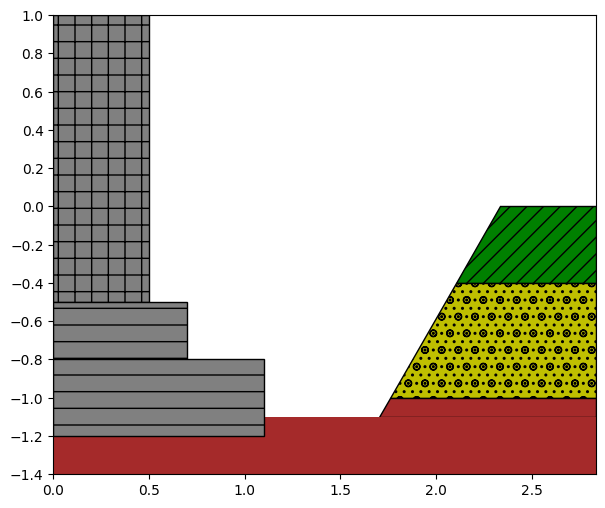

In [263]:
plot_foundation(h_couche,color_couche, symbol_couche,d_mur, h_mur,deb_fond,h_fond,color_fond,symbol_fond)

In [264]:
h_couche[0:2]

[0.4, 0.6]